In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/predictions030_time_cross_40.tsv', sep="\t")
print(df)

   project_ids  sample_ids genders  doses  target  prediction  \
0    SRP161461  SRR7817614    male      0       0           0   
1    SRP049440  SRR1636589  female      0       0           0   
2    SRP161461  SRR7817660    male      0       0           0   
3    SRP161461  SRR7817635    male      0       0           0   
4    SRP075814  SRR3593524  female      0       0           0   
5    SRP161461  SRR7817651    male      0       0           0   
6    SRP161461  SRR7817675    male      0       0           0   
7    SRP161461  SRR7817687    male      0       0           0   
8    SRP161461  SRR7817676    male      0       0           0   
9    SRP161461  SRR7817673    male      0       0           0   
10   SRP161461  SRR7817615    male      0       0           0   
11   SRP049440  SRR1636588  female      0       0           0   
12   SRP161461  SRR7817612    male      0       0           0   
13   SRP161461  SRR7817696    male      0       0           0   
14   SRP161461  SRR781768

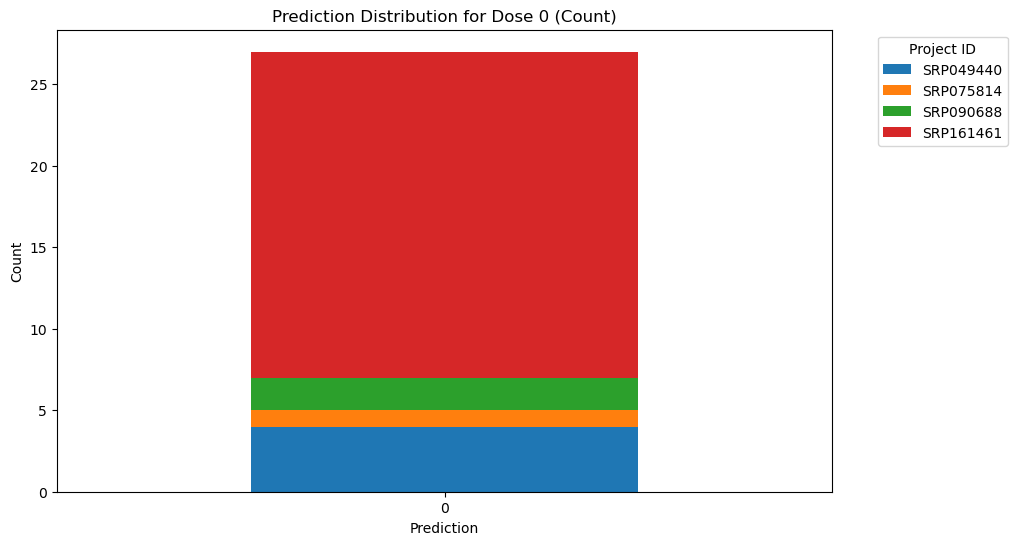

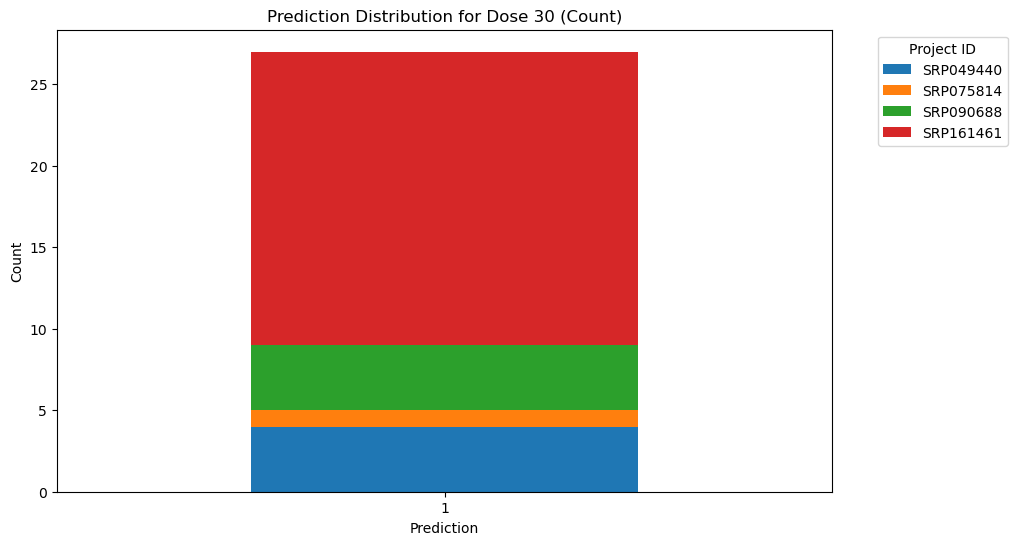

In [ ]:
for dose in df['doses'].unique():
    subset = df[df['doses'] == dose]
    prediction_counts = subset.groupby(['prediction', 'project_ids']).size().unstack(fill_value=0)
    
    ax = prediction_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
    
    plt.title(f'Prediction Distribution for Dose {dose} (Count)')
    plt.xlabel('Prediction')
    plt.ylabel('Count')
    plt.legend(title='Project ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    plt.show()


In [4]:
ig_0 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_0030_time_cross_40.txt', header=None, sep="\t")
ig_1 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/ig_1030_time_cross_40.txt', header=None, sep="\t")
edges = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/gtex/input/edgeLabels.csv', header=None, sep=" ")
result = pd.concat([ig_0, ig_1, edges], axis=1)
result.columns = ["ig_0", "ig_1", "start", "end"]
print(result)

          ig_0      ig_1          start            end
0     0.004205  0.006839  R-MMU-9613507  R-MMU-9613545
1     0.007557  0.006278  R-MMU-9613545  R-MMU-9613562
2     0.004474  0.004828  R-MMU-9613562  R-MMU-9613670
3     0.005887  0.009289  R-MMU-9639715  R-MMU-9640117
4     0.036501  0.045555  R-MMU-9641089  R-MMU-9641096
...        ...       ...            ...            ...
8551  0.017382  0.016750  R-MMU-8856808  R-MMU-8856813
8552  0.040187  0.016588  R-MMU-8868651  R-MMU-8868648
8553  0.002861  0.036015  R-MMU-8868648  R-MMU-8868661
8554  0.052127  0.029830  R-MMU-8868660  R-MMU-8868658
8555  0.002866  0.001526  R-MMU-8863721  R-MMU-8863723

[8556 rows x 4 columns]


In [5]:
import pandas as pd

sorted_by_ig0 = result.sort_values(by='ig_0', ascending=False)

sorted_by_ig1 = result.sort_values(by='ig_1', ascending=False)

sorted_by_ig0.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/sorted_by_ig0030_time_cross_40.csv', sep='\t', index=False)
sorted_by_ig1.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/learning_curve_analysis/output/sorted_by_ig1030_time_cross_40.csv', sep='\t',index=False)

